In [1]:
import pandas as pd
import sqlite3
import os
import seaborn as sns
import matplotlib.pyplot as plt

In C:\Users\wrope\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wrope\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wrope\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\wrope\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wrope\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

# Preparación de los datos simulados para analisis

#### Función para leer datos

In [2]:
def conexion_bd(sql=None, database = None,update=True):
    
    sqlite3.register_adapter(np.int64, lambda val: int(val))
    sqlite3.register_adapter(np.int32, lambda val: int(val))

    con = sqlite3.connect(os.getcwd() + os.sep + database)
    
    try:
        if update == True:
            cur = con.cursor()
            cur.execute(sql)
            con.commit()
            df=None
        else:
            df= pd.read_sql_query(sql, con=con)
    except:
        print(sql)
        df=None
    con.close()
    
    return df

#### Exploración de datos

In [3]:
df1 = conexion_bd(sql='select*from parametros', database = 'result_op.db',update=False) 
df2 = conexion_bd(sql='select*from parametros', database = 'result_op__.db',update=False)
df = pd.concat([df1,df2]).drop_duplicates().reset_index(drop=True)

In [4]:
df3 = conexion_bd(sql="""select id_simulacion, energia_PV, energia_Dg, 
                        energia_carga_bateria, energia_descarga_bateria, 
                        energia_ENS, "SOC(t)_bateria",load, p_bat_pv, p_bat_dg 
                        from resultados""",
                  database='result_op.db',
                  update=False)
df4 = conexion_bd(sql="""select id_simulacion, energia_PV, energia_Dg, 
                        energia_carga_bateria, energia_descarga_bateria, 
                        energia_ENS, "SOC(t)_bateria", load, p_bat_pv, 
                        p_bat_dg from resultados""",
                  database='result_op__.db',
                  update=False)
df0 = pd.concat([df3, df4]).drop_duplicates().reset_index(drop=True)

In [5]:
df0 = df0.groupby('id_simulacion').sum().reset_index()

In [6]:
df_analisis = df.merge(df0, left_on='id_simulacion', right_on='id_simulacion')

In [7]:
df_analisis.describe()

,id_simulacion,n_pv,n_dg,p_dg,min_dg,efi_dg,lpsp,p_bat,cond_init_bat,val_aux_bateria,...,cost_e_ens,energia_PV,energia_Dg,energia_carga_bateria,energia_descarga_bateria,energia_ENS,SOC(t)_bateria,load,p_bat_pv,p_bat_dg
count,127.000000,127.000000,127.0,127.000000,127.000000,127.0,127.000000,127.000000,127.000000,1.270000e+02,...,125.000000,127.000000,127.000000,127.000000,127.000000,127.000000,1.270000e+02,127.000000,127.000000,127.000000
mean,270.062992,309.346457,1.0,4.114173,0.440551,1.0,0.096693,75.613228,75.560315,1.000000e-02,...,1641.990000,29637.813060,3984.051678,25423.216214,15554.243414,1811.999532,7.032357e+05,50988.107684,24178.117476,1310.630250
std,362.395486,127.658733,0.0,4.187182,0.415653,0.0,0.076957,32.625533,32.688616,6.966375e-18,...,1347.023077,26931.704558,3909.795960,26295.633998,14351.834203,1054.719581,8.811603e+05,40554.366262,26994.860192,2429.499611
min,1.000000,110.000000,1.0,0.000000,0.000000,1.0,0.010000,33.600000,33.600000,1.000000e-02,...,18.740000,8805.654824,0.000000,8455.016399,5301.818074,84.808444,1.168502e+05,27385.813200,4752.329831,0.000000
25%,48.500000,190.000000,1.0,0.000000,0.000000,1.0,0.050000,50.400000,50.400000,1.000000e-02,...,792.120000,15071.936757,0.000000,12351.186391,8226.343199,1040.903785,2.157336e+05,28574.956000,10105.080426,0.000000
50%,95.000000,340.000000,1.0,5.500000,0.750000,1.0,0.100000,67.200000,67.200000,1.000000e-02,...,1243.980000,17667.850600,2992.599119,15234.933576,9424.773044,1780.007631,3.968999e+05,32689.208900,15234.933576,0.000000
75%,250.000000,413.500000,1.0,10.000000,0.900000,1.0,0.100000,120.960000,120.960000,1.000000e-02,...,2384.130000,35477.923529,7310.898871,27294.128018,16734.440582,2332.314433,7.850897e+05,58772.711800,27294.128018,2410.387915
max,1007.000000,600.000000,1.0,10.000000,0.900000,1.0,0.500000,141.120000,141.120000,1.000000e-02,...,4751.580000,119107.364500,12203.054470,115412.647516,63494.463500,3994.163492,3.657357e+06,186330.148900,115412.647516,8423.007702


In [9]:
df_analisis.columns

Index(['id_simulacion', 'n_pv', 'n_dg', 'p_dg', 'min_dg', 'efi_dg', 'lpsp',
       'p_bat', 'cond_init_bat', 'val_aux_bateria', 'DOD', 'n_bat',
       'self_dis_coef', 'max_ciclos_descarga', 'efficiency_inversor',
       'efficiency_charging', 'C_rate', 'cost_pv', 'cost_dg', 'cost_bat',
       'cost_pens', 'optimizacion', 'lpsp_result', 'ens_result',
       'ciclos_bat_result', 'vida_proyecto', 'ir', 'crf', 'cpv_ins',
       'cbat_ins', 'cdg_ins', 'capital_cpv', 'capital_cbat', 'capital_cdg',
       'kbat', 'kdg', 'ybat', 'ydg', 'rc_bat', 'rc_dg', 'factor_bat',
       'factor_pv', 'oym_pv', 'oym_bat', 'ipp_actual', 'trm', 'pami', 'plim',
       'oym_dg', 'asc', 'lcoe', 'asc_incentivo', 'lcoe_incentivo', 'cost_e_dg',
       'cost_e_pv', 'cost_e_bat', 'cost_e_ens', 'energia_PV', 'energia_Dg',
       'energia_carga_bateria', 'energia_descarga_bateria', 'energia_ENS',
       'SOC(t)_bateria', 'load', 'p_bat_pv', 'p_bat_dg'],
      dtype='object')

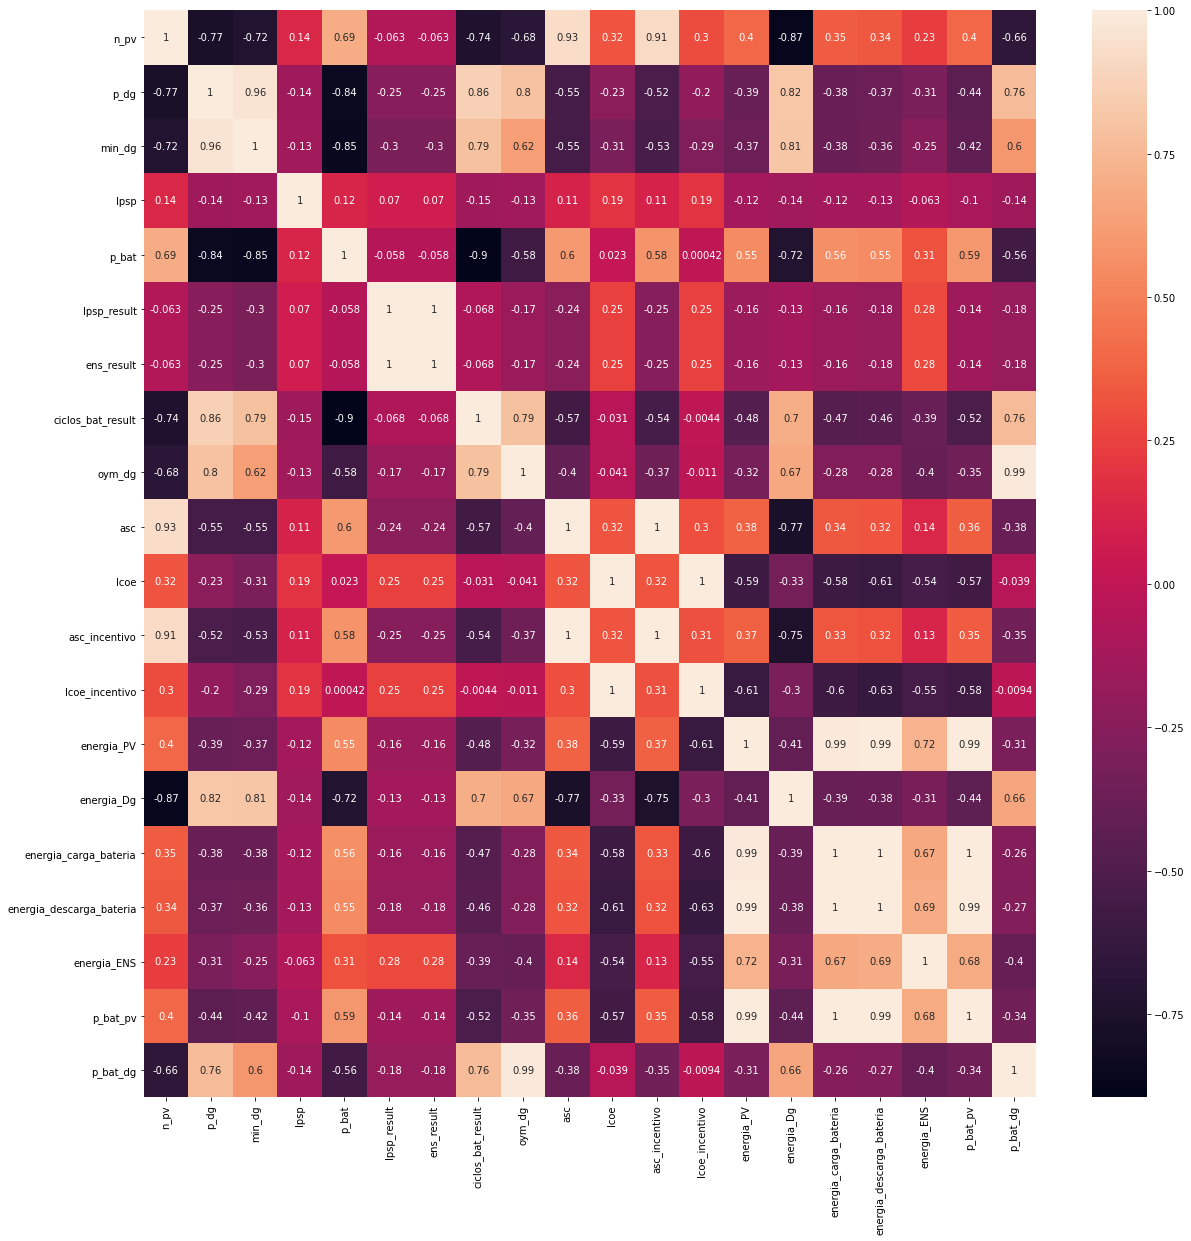

In [14]:
corrMatrix = df_analisis.query('optimizacion=="optimal"')[[
    'n_pv', 'p_dg', 'min_dg', 'lpsp', 'p_bat','optimizacion',
    'lpsp_result', 'ens_result', 'ciclos_bat_result', 'oym_dg', 'asc', 'lcoe',
    'asc_incentivo', 'lcoe_incentivo', 'energia_PV', 'energia_Dg',
    'energia_carga_bateria', 'energia_descarga_bateria', 'energia_ENS',
    'p_bat_pv', 'p_bat_dg']].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
['id_simulacion', 'n_pv', 'n_dg', 'p_dg', 'min_dg', 'efi_dg', 'lpsp',
       'p_bat', 'cond_init_bat', 'val_aux_bateria', 'DOD', 'n_bat',
       'self_dis_coef', 'max_ciclos_descarga', 'efficiency_inversor',
       'efficiency_charging', 'C_rate', 'cost_pv', 'cost_dg', 'cost_bat',
       'cost_pens', 'optimizacion', 'lpsp_result', 'ens_result',
       'ciclos_bat_result', 'vida_proyecto', 'ir', 'crf', 'cpv_ins',
       'cbat_ins', 'cdg_ins', 'capital_cpv', 'capital_cbat', 'capital_cdg',
       'kbat', 'kdg', 'ybat', 'ydg', 'rc_bat', 'rc_dg', 'factor_bat',
       'factor_pv', 'oym_pv', 'oym_bat', 'ipp_actual', 'trm', 'pami', 'plim',
       'oym_dg', 'asc', 'lcoe', 'asc_incentivo', 'lcoe_incentivo', 'cost_e_dg',
       'cost_e_pv', 'cost_e_bat', 'cost_e_ens']

In [9]:
df[['n_pv', 'n_dg', 'lpsp', 'p_dg', 'min_dg', 'p_bat',
    'asc', 'lcoe', 'asc_incentivo', 'lcoe_incetivo','']]

Index(['id_simulacion', 'n_pv', 'n_dg', 'p_dg', 'min_dg', 'efi_dg', 'lpsp',
       'p_bat', 'cond_init_bat', 'val_aux_bateria', 'DOD', 'n_bat',
       'self_dis_coef', 'max_ciclos_descarga', 'efficiency_inversor',
       'efficiency_charging', 'C_rate', 'cost_pv', 'cost_dg', 'cost_bat',
       'cost_pens', 'optimizacion', 'lpsp_result', 'ens_result',
       'ciclos_bat_result', 'vida_proyecto', 'ir', 'crf', 'cpv_ins',
       'cbat_ins', 'cdg_ins', 'capital_cpv', 'capital_cbat', 'capital_cdg',
       'kbat', 'kdg', 'ybat', 'ydg', 'rc_bat', 'rc_dg', 'factor_bat',
       'factor_pv', 'oym_pv', 'oym_bat', 'ipp_actual', 'trm', 'pami', 'plim',
       'oym_dg', 'asc', 'lcoe', 'asc_incentivo', 'lcoe_incentivo', 'cost_e_dg',
       'cost_e_pv', 'cost_e_bat', 'cost_e_ens'],
      dtype='object')

# Preguntas de investigación

### ¿El costo baja o sube cuando aumenta el uso de la generación diésel?

### ¿Cómo se comporta el modelo al variar el LPSP?

### ¿ El modelo mejora la prestación del servicio comparado con lo que esta actual?

### ¿Cómo se comporta el tiempo de convergencia del modelo al variar los parametros?

### ¿Qué tipo de problema de opt es y cómo se comporta en solvers de tipo libre (COIN)?